CATANIA

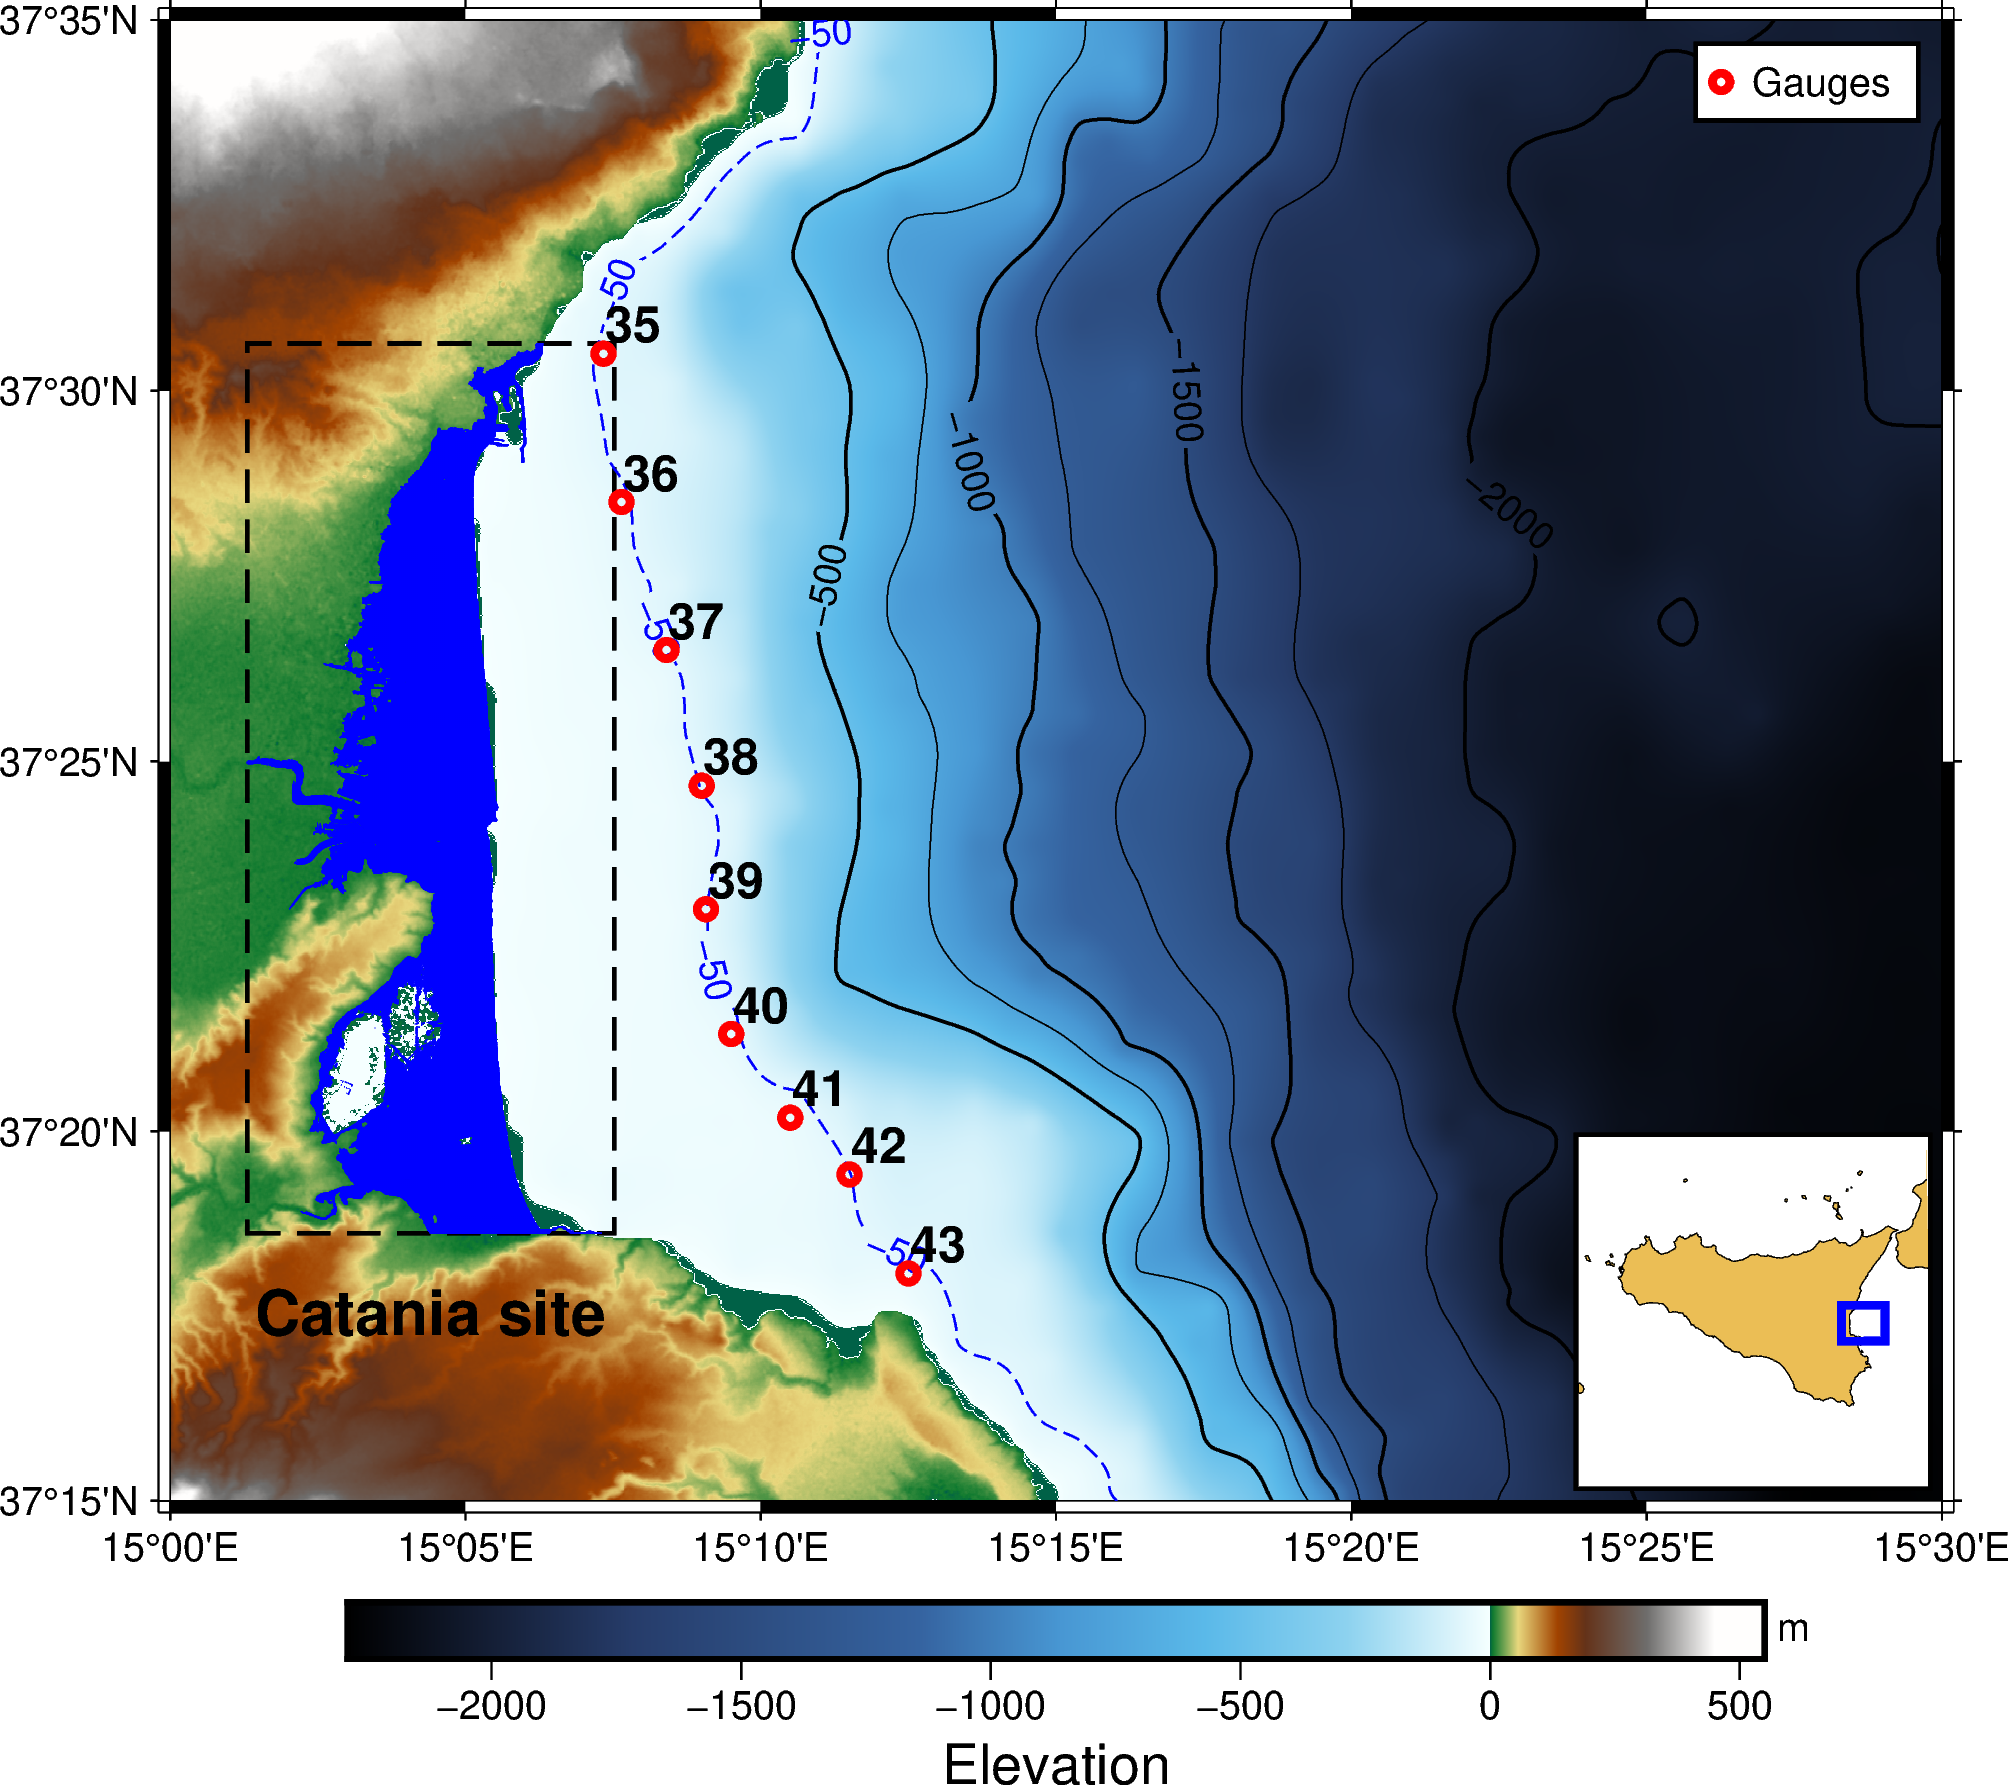

In [2]:
import pygmt
import xarray as xr
import pandas as pd
import numpy as np

#main plot region
region=[15, 15.5,37.25, 37.58]

#read grid lat lon info from text file
grid_info = pd.read_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/processed/lat_lon_idx_CT_1658.txt',sep=',')
#add columns name
grid_info.columns = ['m','n','lat','lon']

# Load the grid
grid_CT = xr.open_dataset('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/data/processed/CT_defbathy.nc',engine='netcdf4')

grid = pygmt.datasets.load_earth_relief(
    resolution="01s", region=region, registration="gridline"
)

#read offshore points from 
gauges = pd.read_csv('/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/resources/raw/pois_depth.csv',sep=',')

CT_gauges = list(range(35,44))

#combine both
selected_gauges =  gauges.iloc[CT_gauges]

fig = pygmt.Figure()

fig.grdimage(grid=grid, frame="a", projection="M15c", cmap="geo",transparency=50,shading=False)

#plot CT and SR grids area as rectangles
fig.plot(
    data = np.array([[float(grid_CT['x'].min().values),
                    float(grid_CT['y'].min().values),
                    float(grid_CT['x'].max()),
                    float(grid_CT['y'].max())]]),
    style='r+s',
    pen= "1p,black,-",)

#plot grids from text file
fig.plot(
        x = grid_info['lon'],
        y = grid_info['lat'],
        transparency=90,
        style="s0.0022c",
        pen="0.005p,blue",
)

# fig.coast(shorelines="2p,gray",region=[14.9, 15.5,37.25, 37.5888],frame="a", projection="M15c",)
fig.grdcontour(grid=grid, interval=250, annotation=500,limit=[-2000, -500])
fig.grdcontour(grid=grid, interval=50, annotation=50,limit=[-56, -49], pen="0.5p,blue,--",label_placement="d3c")

fig.plot(
    x=selected_gauges['lon'],
    y=selected_gauges['lat'],
    style="c0.15",
    pen="2p,red",
    label="Gauges ",
)

#add annotations for gauges
for i in range(len(selected_gauges)):
    fig.text(
        x=selected_gauges['lon'].iloc[i],
        y=selected_gauges['lat'].iloc[i],
        text=selected_gauges['id'].iloc[i],
        font="12p,Helvetica-Bold,black",
        justify="CM",
        offset="0.25c",
    )


fig.text(
    x=15.07,    
    y=37.29,
    text="Catania site",
    font="15p,Helvetica-Bold,black",
    justify="CM",
    offset="0.1c",
)

with fig.inset(position="jBR+w3c/3c+o0.1c", box="+gwhite+p1p"):
    # Plot the Sicily main land in the inset using coast. "U54S/M?" means UTM
    # projection with map width automatically determined from the inset width.
    # Highlight the Japan area in "lightbrown"
    # and draw its outline with a pen of "0.2p".
    fig.coast(
        region=[12, 16, 36, 39],
        projection="U33S/?",
        dcw="IT+glightbrown+p0.2p",
        area_thresh=10000,
    )
    # Plot a rectangle ("r") in the inset map to show the area of the main figure.
    # "+s" means that the first two columns are the longitude and latitude of
    # the bottom left corner of the rectangle, and the last two columns the
    # longitude and latitude of the uppper right corner.
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data=rectangle, style="r+s", pen="2p,blue")

fig.colorbar(frame=["a500", "x+lElevation", "y+lm"])
fig.legend()
fig.savefig('plots/Catania.png',dpi=600)
fig.show()


Modelling Region and HSZ

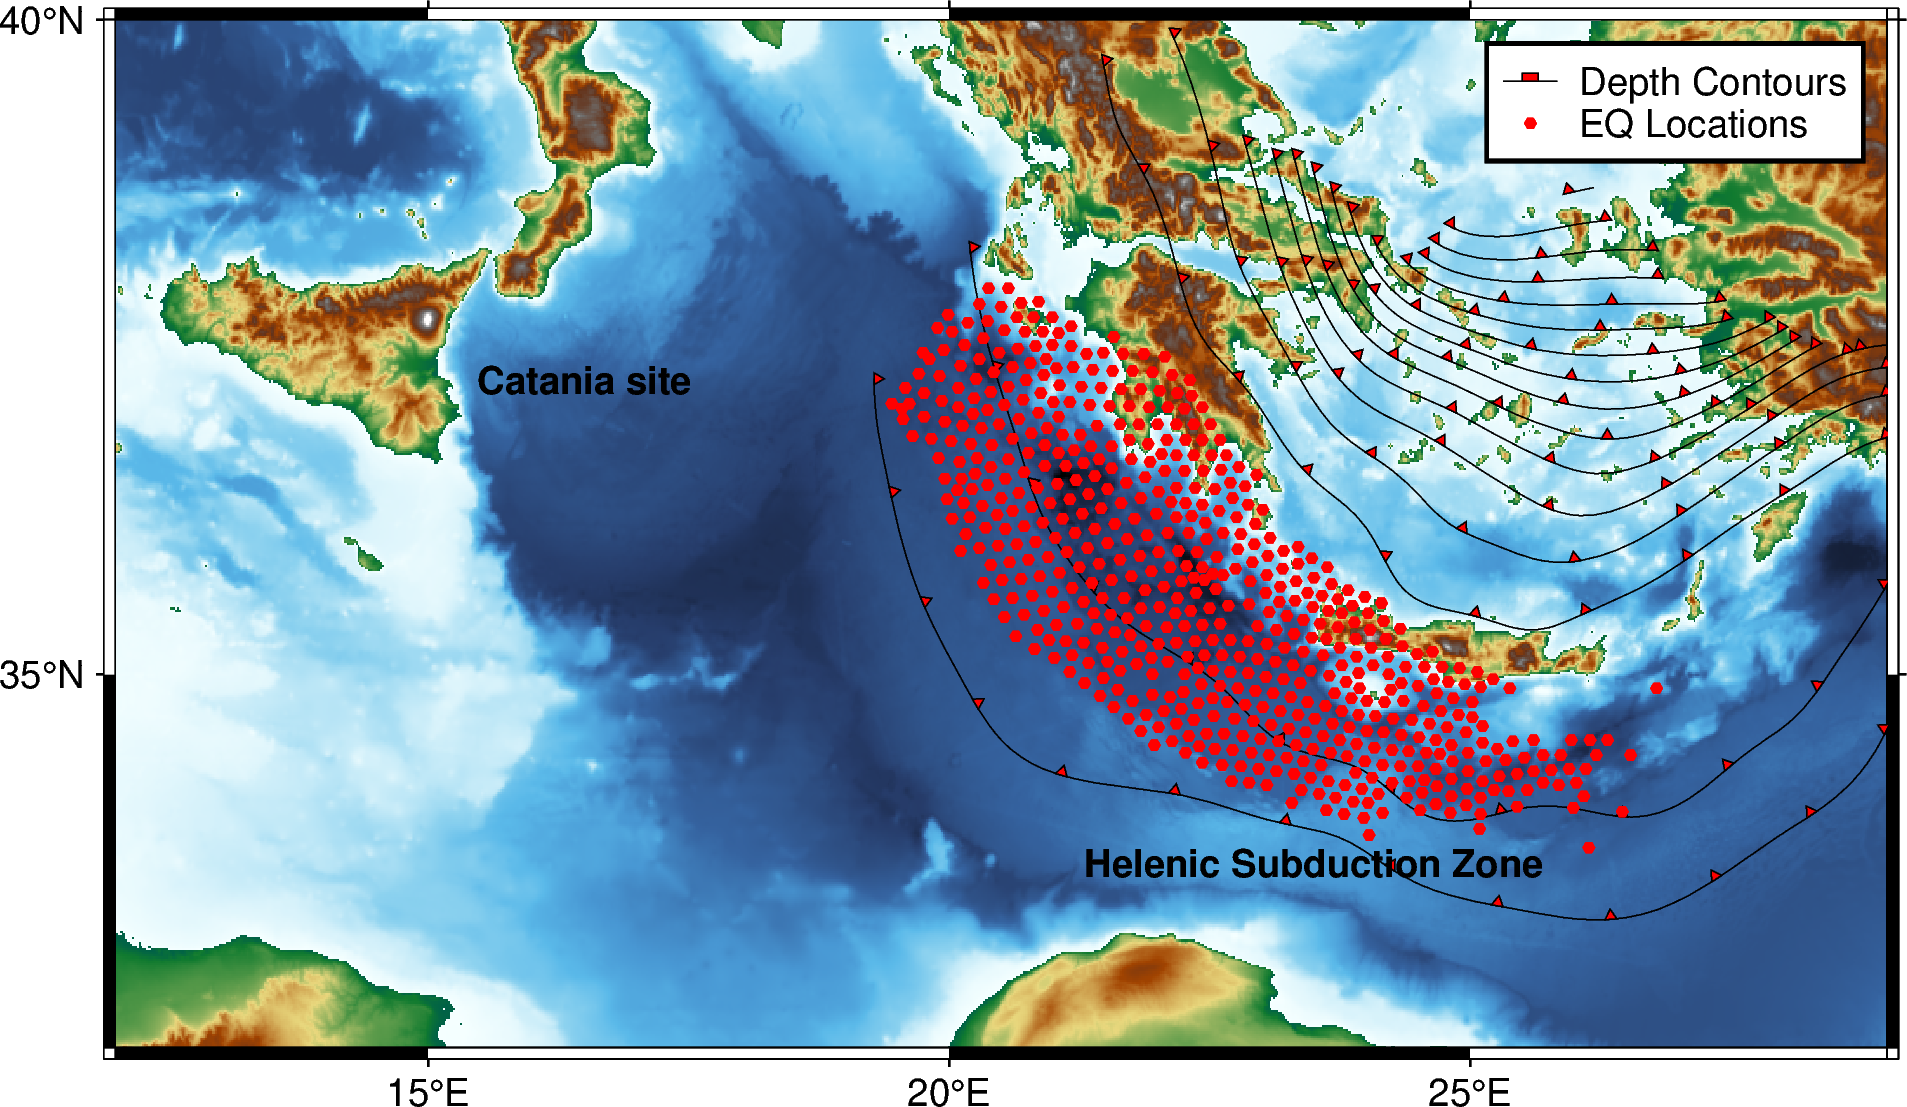

In [1]:
import os
import numpy as np
import pygmt
import pandas as pd
import geopandas as gpd

fig = pygmt.Figure()

# Load the grid
grid = pygmt.datasets.load_earth_relief(resolution="01m",region=[12, 29, 32, 40])
fig = pygmt.Figure()
fig.grdimage(grid=grid, projection="M15c", frame="a", cmap="geo")

# Load the earthquake events data
data_events = pd.read_csv('../../data/info/PS_Helenic_sampling_input_CT_41.csv',sep=',')
#get unique lat lon values
data_events = data_events.drop_duplicates(subset=['lat','lon'])

# Plot the geodataframe lines
fig.plot(
    data='../../resources/gis/bathy/hel_depth.shp',
    label = 'Depth Contours',
    style="f1c/0.1c+l+t",
    fill='red',
    transparency=50,
)

# Create scatter plots for BS events
fig.plot(
    x=data_events['lon'],
    y=data_events['lat'],
    style="h0.1",
    fill="red",
    pen="0.1p,red",
    label="EQ Locations",
    transparency=90,
)

fig.text(
    x=23.5,
    y=33.5,
    text="Helenic Subduction Zone",
    font="Helvetica-Bold",
)

fig.text(
    x=16.5,    
    y=37.29,
    text="Catania site",
    font="Helvetica-Bold,black",
    justify="CM",
)

# Add a legend	
fig.legend()

# Save or display the map
fig.savefig("plots/Med_Region.png",dpi=600)
fig.show()


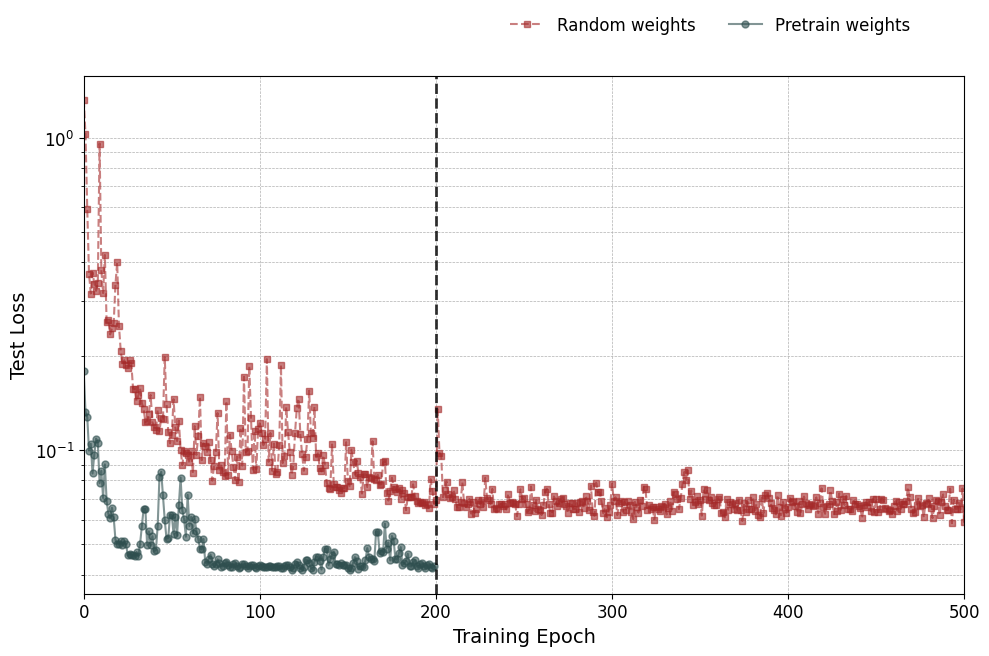

In [46]:
import matplotlib.pyplot as plt
import contextily as cx
import pandas as pd
import numpy as np

# Load file
MLDir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami' 
ModelDir = f'{MLDir}/model/backup/WC23/out'
reg = 'CT'
if reg == 'CT':
    columnname = str(38)


# Generate some example data for demonstration
direct_loss = np.load(f"/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/CT/out/test_loss_direct_1658.npy")
pretrain_loss = np.load(f"/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami/model/CT/out/test_loss_couple_1658.npy")

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the graph for CT with enhanced styling
ax.plot(direct_loss, label='Random weights', color='brown', linestyle='--', marker='s', linewidth=1.5, alpha=0.6, markersize=5)
ax.plot(pretrain_loss, label='Pretrained weights', color='darkslategrey', linestyle='-', marker='o', linewidth=1.5, alpha=0.6, markersize=5)
ax.axvline(x=200, color='k', linestyle='--', linewidth=2, alpha=0.8)  # Adding vertical line for early stopping epoch
ax.set_xlabel('Training Epoch', fontsize=14)
ax.set_ylabel('Test Loss', fontsize=14)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlim(0, 500)
ax.set_yscale('log')
fig.legend(fontsize =12, loc='outside upper left', ncol=2, shadow=False, frameon=False,bbox_to_anchor=(0.5, 1.1))  # Adding legend with shadow
plt.tight_layout()
plt.savefig('./plots/Pretrain_benefits.png', dpi=150, bbox_inches='tight')

Read Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load file
MLDir = '/mnt/beegfs/nragu/tsunami/ML4SicilyTsunami' 
ModelDir = f'{MLDir}/model/backup/WC23/out'
reg = 'CT'
if reg == 'CT':
    columnname = str(38)

#read reconstructions and scores
test_size = '20430'
reg = 'CT'
table = pd.read_csv(f'{MLDir}/model/backup/WC23/out/PStrue_pred_er_r2scores.csv',sep=',')
overall = pd.read_csv(f'{MLDir}/model/CT/results/model_coupled_off[64, 128, 256]_on[16, 128, 128]_892_compile_combined.csv',sep=',')
overall = overall[overall['SR']=='HL']
train_list = np.loadtxt(f'{MLDir}/data/events/old/sample_events3200_CT_41.txt',dtype=str) 
recon_data = np.load(f'{ModelDir}/recon_data_CT_20430.npy')
recon_max = np.max(recon_data,axis=(1))
#select train events from overall
train = overall[overall['id'].isin(train_list)]
risk_scores = pd.read_csv(f'{MLDir}/model/backup/WC23/out/PS_pop_resi_non_scores.csv',sep=',')


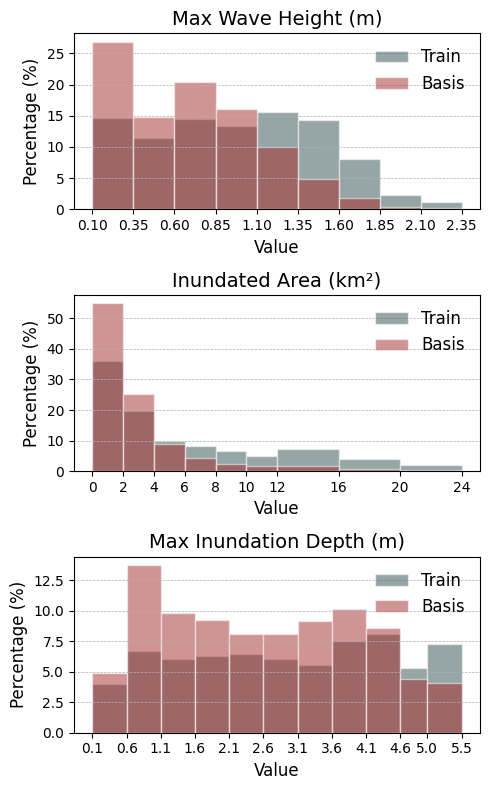

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df, df2, df_ht, df2_ht are defined elsewhere in your script

def plot_hist(ax, basis, train, bins):
    ax.hist(train,
            weights=100.0 * np.ones(len(train)) / len(train),
            bins=bins, align='mid', facecolor='darkslategray',
            edgecolor='white',
            label='Train',
            cumulative=False,alpha=0.5)
    ax.hist(basis,
            weights=100.0 * np.ones(len(basis)) / len(basis),
            bins=bins, align='mid', facecolor='brown',
            edgecolor='white',
            label='Basis',
            cumulative=False,alpha=0.5)
    ax.set_xticks(bins)
    ax.set_ylabel('')

fig, ax = plt.subplots(3, 1, figsize=(5, 8))
ax = ax.flatten()
row_titles = ['Max Wave Height (m)', 'Inundated Area (km²)', 'Max Inundation Depth (m)']

# Max Wave Height
bins_wl = np.concatenate((np.arange(0.1, 0.1, 0.1), np.arange(0.1, 2.5, 0.25)))
bins_area =  np.concatenate((np.arange(0.0, 12, 2), np.arange(12, 28, 4)))
bins_dep =  np.concatenate((np.arange(0.1, 5, 0.5),np.arange(5, 6, 0.5)))

plot_hist(ax[0], overall['max_off'],train['max_off'], bins_wl) 
plot_hist(ax[1], overall['count'] * 0.0001, train['count']* 0.0001, bins_area)
plot_hist(ax[2], overall['dmax'],train['dmax'], bins_dep)

for i, title in enumerate(row_titles):
        ax[i].set_title(title, fontsize=14)
        ax[i].set_xlabel('Value', fontsize=12)
        ax[i].set_ylabel('Percentage (%)', fontsize=12)
        ax[i].grid(axis='y', linestyle='--', linewidth=0.5)
        ax[i].legend(loc='upper right', fontsize=12, frameon=False)
plt.tight_layout()
plt.savefig('./plots/hist_traintest.png', dpi=150, bbox_inches='tight')
plt.show()


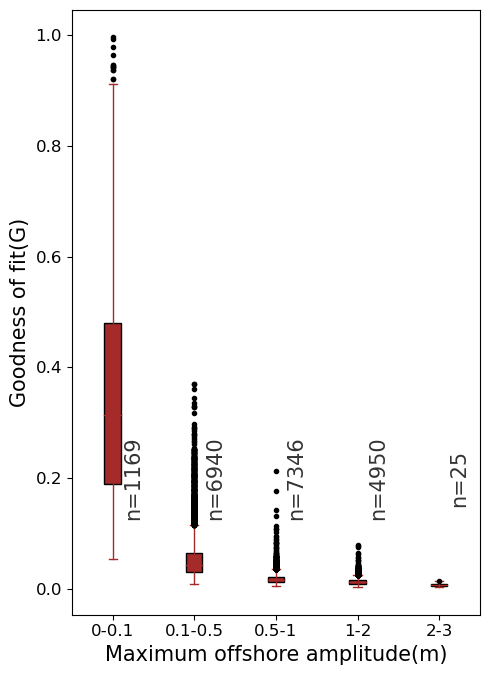

In [75]:
# Set the bin edges for 'max_off' values
bin_edges = [0, 0.1, 0.5, 1, 2, 3]  # Define your custom bin edges here
# Create a box plot of 'gfit_out' binned by 'max_off' using custom bin edges
plt.figure(figsize=(5, 7))
#set transparent background
plt.rcParams['axes.facecolor'] = 'none'
table['max_off_bin'] = pd.cut(table['max_off'], bin_edges)

table.boxplot(column='gfit_out', by='max_off_bin', 
              vert=True, showfliers=True,widths=0.2,
              sym='k.',patch_artist=True, color='brown',
              boxprops=dict(facecolor='brown', color='k'),
              whiskerprops=dict(color='k'),
              capprops=dict(color='k'),   
              medianprops=dict(color='k'),
              ax=plt.gca())
              
bin_counts = table.groupby('max_off_bin').size()
counts = bin_counts.to_list()
#Add counts to plot
for i in range(len(bin_edges)-1):
    plt.text(i+1.25, 0.2, f'n={counts[i]}', fontsize=15, 
             ha='center', va='center', color='black',
             rotation=90, alpha=0.8)
# Set labels and titles
plt.xticks(labels=[f'{bin_edges[i]}-{bin_edges[i+1]}' for i in range(len(bin_edges)-1)], ticks=range(1, len(bin_edges)),fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Goodness of fit(G)',fontsize=15)
plt.xlabel('Maximum offshore amplitude(m)',fontsize=15)
plt.title('')
plt.grid(False)
plt.suptitle('')
plt.tight_layout()
plt.savefig('./plots/Goodness_of_fit.png', dpi=150, bbox_inches='tight')
plt.show()

Training Location Sensitivity

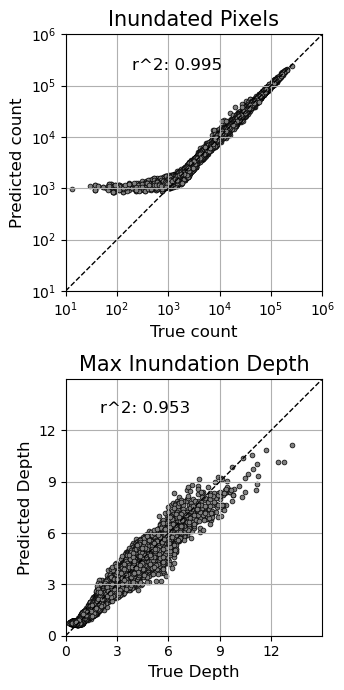

In [83]:
from sklearn.metrics import r2_score

# Create a single figure with three axes
fig, ax = plt.subplots(2, 1, figsize=(5, 7))
# Plot scatter of flood count
x = table['true']
y = table['pred']
r2area = r2_score(x, y)
scatter = ax[0].scatter(x, y, s=12,label='test', c='grey',edgecolors="k",linewidths=0.5,alpha = 1)

#add r2 score at bottom right of axis
ax[0].text(200,2e5,f"r^2: {r2area:.3f} ", fontsize=12)
ax[0].set_title("Inundated Pixels",fontsize=15)

ax[0].plot([0, 1], [0, 1], transform=ax[0].transAxes, color='k',linestyle = 'dashed',linewidth = 1)
ax[0].set_aspect('equal', adjustable='box')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlim(10, 1000000)
ax[0].set_ylim(10, 1000000)
ax[0].grid()
ax[0].minorticks_off()
ax[0].set_xlabel('True count',fontsize=12)
ax[0].set_ylabel('Predicted count',fontsize=12)

# Plot scatter of max depth for each event
x = table['max']
y = recon_max
scatter = ax[1].scatter(x, y,s=12,label='test', c='grey',edgecolors="k",linewidths=0.5,alpha = 1)
r2maxdepth = r2_score(x, y)
ax[1].text(2, 13, f"r^2: {r2maxdepth:.3f} ", fontsize=12)
ax[1].plot([0, 1], [0, 1], transform=ax[1].transAxes, color='k',linestyle = 'dashed',linewidth = 1)
ax[1].set_title("Max Inundation Depth",fontsize=15)

ax[1].set_xlim(0, 15)
ax[1].set_ylim(0, 15)
ax[1].grid()
ax[1].set_xlabel('True Depth',fontsize=12)
ax[1].set_ylabel('Predicted Depth',fontsize=12)
ax[1].set_aspect('equal', adjustable='box')
ax[1].xaxis.set_ticks(np.arange(0, 15, 3))
ax[1].yaxis.set_ticks(np.arange(0, 15, 3))

plt.tight_layout()
plt.savefig('./plots/TestTrainPerf.png', dpi=150, bbox_inches='tight')


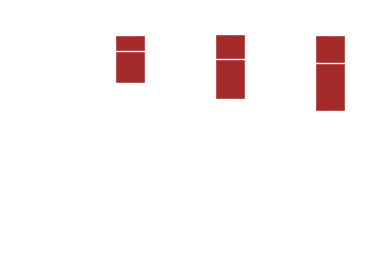

In [111]:
#plot box plot of accuracy score for all events using three exposure classes pop, resi, nonresi
#set font and box as white
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'

fig, ax = plt.subplots(figsize=(4, 3))
ax.set_title('Accuracy in flood mapping, intersecting with the diff. exposure classes')
ax.boxplot([risk_scores['pop_acc'],risk_scores['resi_acc'],risk_scores['nonresi_acc']],
           widths=0.3,sym='k.',patch_artist=True,showfliers=False,
            boxprops=dict(facecolor='brown', color='w'),
            whiskerprops=dict(color='w'),
            capprops=dict(color='w'),   
            medianprops=dict(color='w'),)
ax.set_xticklabels(['Pop.','Resid.','Non-Resi.'], fontsize=12,color='white')
ax.set_ylabel('Accuracy', fontsize=18, color='white')
ax.grid(axis='y', linestyle='--', linewidth=0.5, color='white')
plt.tight_layout()
plt.suptitle('')
plt.title('')

plt.savefig('./plots/Accuracy_Boxplot.png', dpi=300, bbox_inches='tight',transparent=True)
plt.show()

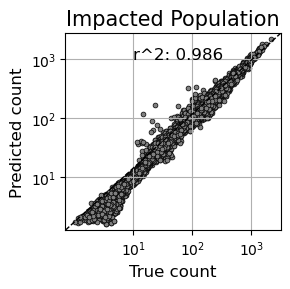

In [93]:
from sklearn.metrics import r2_score

# Create a single figure with three axes
fig, ax = plt.subplots( figsize=(3,3))

# Plot scatter of flood count
x = risk_scores['pop_true']
y = risk_scores['pop_pred']
r2area = r2_score(x, y)
scatter = ax.scatter(x, y, s=12,label='test', c='grey',edgecolors="k",linewidths=0.5,alpha = 1)

#add r2 score at bottom right of axis
ax.text(10,1e3,f"r^2: {r2area:.3f} ", fontsize=12)
ax.set_title("Impacted Population",fontsize=15)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='k',linestyle = 'dashed',linewidth = 1)
ax.set_aspect('equal', adjustable='box')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1, 10000)
ax.set_ylim(1, 10000)
ax.grid()
ax.minorticks_off()
ax.set_xlabel('True count',fontsize=12)
ax.set_ylabel('Predicted count',fontsize=12)
ax.set_xticks([10,100,1000])

plt.tight_layout()
plt.axis('equal')
plt.savefig('./plots/Pop_Pred.png', dpi=300, bbox_inches='tight')